# Sms spam classifier

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
warnings.filterwarnings("ignore")


In [2]:
with open("spam.csv","rb") as f:
    result=chardet.detect(f.read())
print(result['encoding'])
df_raw=pd.read_csv("spam.csv", encoding=result['encoding'])

Windows-1252


In [3]:
df_raw.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df_raw[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [5]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.drop_duplicates(subset='sms', inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X=df['sms']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [9]:
train_corpus = list(X_train)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

Model 1: Logistic Regression:
Since this is a binary classification problem, use of logistic regression classifier is justified.

In [12]:

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)
pipeline_logistic = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logistic_regression)])

Cross validation score:

In [13]:
cv_score_regression = cross_val_score(pipeline_logistic, X_train, y_train, cv=5)
print("The cross validation score for Logistic Regression is {}.".format(cv_score_regression))
cv_mean=cv_score_regression.mean()
cv_dispersion=cv_score_regression.std()
if cv_mean!=0:
    print("The coefficient of variation of the cross validation values is {}.".format(((cv_dispersion)/abs(cv_mean))*100))
else:
    print("The mean and standard deviation of the cross validation score is {} and {} respectively.".format(cv_mean,cv_dispersion))



The cross validation score for Logistic Regression is [0.96134021 0.95876289 0.96645161 0.95612903 0.95994832].
The coefficient of variation of the cross validation values is 0.3562660419042317.


In [14]:
def convert_binary(label):
    if label == 'ham':
        return 1
    else:
        return 0

Accuracy:
Note: convert the labels to binary labels to use precision and recall

Accuracy:  0.9644238205723125
Precision:  0.962510897994769
Recall:  0.997289972899729
F1 score:  0.979591836734694
The precision-recall curve


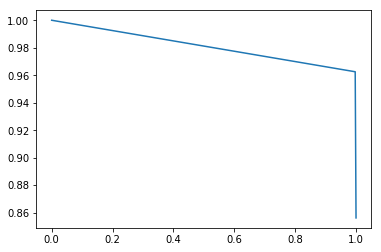

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline_logistic.fit(X_train, y_train)
y_predicted = pipeline_logistic.predict(X_test)

y_true = [convert_binary(label) for label in list(y_test)] 
y_predict = [convert_binary(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision-recall curve")
precision,recall,threshold= precision_recall_curve(y_true, y_predict)
plt.plot(recall,precision)

Model 2: Decision Tree: 
Decision tree builds classification or regression models in the form of a tree structure.
It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
The final result is a tree with decision nodes and leaf nodes. Decision tree at every stage selects the one that gives best information gain.

In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)
pipeline_decisionTree=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',decision_tree)])

Cross validation score:

In [17]:
cv_score_dTree= cross_val_score(pipeline_decisionTree,X_train,y_train,cv=5)
print("The cross validation score for Decision Tree classifier is {}.".format(cv_score_dTree))
cv_mean=cv_score_dTree.mean()
cv_dispersion=cv_score_dTree.std()
if cv_mean!=0:
    print("The coefficient of variation of the cross validation values is {}.".format(((cv_dispersion)/abs(cv_mean))*100))
else:
    print("The mean and standard deviation of the cross validation score is {} and {} respectively.".format(cv_mean,cv_dispersion))


The cross validation score for Decision Tree classifier is [0.94458763 0.94845361 0.95612903 0.95354839 0.95736434].
The coefficient of variation of the cross validation values is 0.5053761088154579.


Accuracy:

Accuracy:  0.9597834493426141
Precision:  0.9680567879325643
Recall:  0.985546522131888
F1 score:  0.9767233661593554
Support:  None
The precision-recall curve


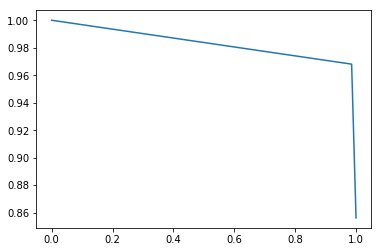

In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline_decisionTree.fit(X_train,y_train)
y_predicted=pipeline_decisionTree.predict(X_test)

y_predict=[convert_binary(labels) for labels in list(y_predicted)]

accuracy=accuracy_score(y_test, y_predicted)
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_predict, average='binary')
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)
print("Support: ", support)


print("The precision-recall curve")
precision,recall,threshold= precision_recall_curve(y_true, y_predict)
plt.plot(recall,precision)


Model 3: Random Forrest:
Random forest classifier creates a set of decision trees from randomly selected subset of training set. 
It then aggregates the votes from different decision trees to decide the final class of the test object.
This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees
reduce the effect of noise giving more accurate results.the random forest can apply weight concept for considering
the impact of result from any decision tree. Tree with high error rate are given low weight value and vise versa.
This would increase the decision impact of trees with low error rate.

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
pipeline_random_forest=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',random_forest)])

Cross validation score:

In [20]:
cv_score_rForest=cross_val_score(pipeline_random_forest,X_train,y_train,cv=5)
print("The cross validation score for a Random Forest Classifier is {}.".format(cv_score_rForest))
cv_mean=cv_score_rForest.mean()
cv_dispersion=cv_score_rForest.std()
if cv_mean!=0:
    print("The coefficient of variation of the cross validation values is {}.".format(((cv_dispersion)/abs(cv_mean))*100))
else:
    print("The mean and standard deviation of the cross validation score is {} and {} respectively.".format(cv_mean,cv_dispersion))


The cross validation score for a Random Forest Classifier is [0.94974227 0.96649485 0.97677419 0.95741935 0.95865633].
The coefficient of variation of the cross validation values is 0.953724961196443.


Accuracy:

Accuracy:  0.9675174013921114
Precision:  0.9642545771578029
Recall:  0.999096657633243
F1 score:  0.981366459627329
Support:  None
The precision-recall curve


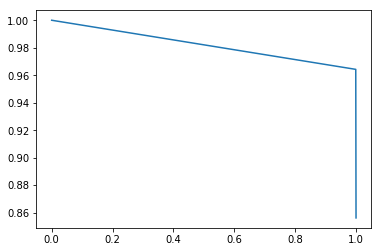

In [21]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline_random_forest.fit(X_train,y_train)
y_predicted=pipeline_random_forest.predict(X_test)

y_predict=[convert_binary(labels) for labels in list(y_predicted)]

accuracy=accuracy_score(y_test, y_predicted)
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_predict, average='binary')
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)
print("Support: ", support)


print("The precision-recall curve")
precision,recall,threshold= precision_recall_curve(y_true, y_predict)
plt.plot(recall,precision)
